## IMPORT LIBRARY

In [130]:
# 1. IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import joblib
import os

Kode ini menyiapkan semua alat penting untuk memproses data, membangun model klasifikasi dengan Random Forest, mengevaluasi performanya, dan menyimpan hasilnya agar bisa digunakan dalam aplikasi prediksi ke depannya.

**Penjelasan Singkat:**

pandas & numpy: Untuk membaca dan mengolah data.

RandomForestClassifier: Algoritma klasifikasi berbasis banyak pohon keputusan.

train_test_split: Membagi data menjadi latih dan uji.

classification_report, confusion_matrix, accuracy_score: Mengevaluasi kinerja model.

matplotlib.pyplot: Membuat grafik (jika diperlukan).

joblib: Menyimpan/memuat model.

os: Mengelola file dan direktori.

## LOAD DATA

In [131]:
file_path = 'dataset_risiko_do_mahasiswa1500.csv'
df = pd.read_csv(file_path)
df.head()

,ID,IPK_Sem1,IPK_Sem2,IPK_Sem3,IPK_Sem4,Kehadiran_Rata,Remedial_Total,Aktivitas_Online,Pekerjaan,Jam_Kerja_Mingguan,Pendapatan_OrangTua,Tanggungan_Keluarga,Risiko_DO
0,M0001,3.05,2.85,2.59,2.26,79.7,1,8,Tidak,0,8.4,6,Tidak
1,M0002,2.73,2.69,2.68,2.49,75.0,0,16,Tidak,0,6.2,7,Tidak
2,M0003,3.12,2.88,2.89,2.61,78.3,0,6,Tidak,0,6.1,10,Tidak
3,M0004,3.56,3.47,3.61,3.45,87.1,1,11,Tidak,0,7.3,8,Tidak
4,M0005,2.68,2.11,1.70,1.64,92.8,2,11,Tidak,0,6.3,9,Tidak


kode diatas digunakan untuk melakukan prosses load terhadap dataset yang akan digunakan yaitu dataset_risiko_do_mahasiswa.csv

## PREPROCESSING

In [132]:
# Menampilkan informasi dasar dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1500 non-null   object 
 1   IPK_Sem1             1500 non-null   float64
 2   IPK_Sem2             1500 non-null   float64
 3   IPK_Sem3             1500 non-null   float64
 4   IPK_Sem4             1500 non-null   float64
 5   Kehadiran_Rata       1500 non-null   float64
 6   Remedial_Total       1500 non-null   int64  
 7   Aktivitas_Online     1500 non-null   int64  
 8   Pekerjaan            1500 non-null   object 
 9   Jam_Kerja_Mingguan   1500 non-null   int64  
 10  Pendapatan_OrangTua  1500 non-null   float64
 11  Tanggungan_Keluarga  1500 non-null   int64  
 12  Risiko_DO            1500 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage: 152.5+ KB
None


kode diatas digunakan untuk menampilkan info dari dataset yang digunakan

In [133]:
# Menampilkan statistik deskriptif dataset
print(df.describe())

          IPK_Sem1     IPK_Sem2     IPK_Sem3     IPK_Sem4  Kehadiran_Rata  \
count  1500.000000  1500.000000  1500.000000  1500.000000     1500.000000   
mean      2.823713     2.820473     2.805607     2.798607       80.034600   
std       0.490185     0.563376     0.614360     0.655775        9.736845   
min       1.500000     1.500000     1.500000     1.500000       50.000000   
25%       2.490000     2.430000     2.370000     2.320000       73.700000   
50%       2.825000     2.820000     2.810000     2.780000       80.150000   
75%       3.140000     3.210000     3.252500     3.300000       86.700000   
max       4.000000     4.000000     4.000000     4.000000      100.000000   

       Remedial_Total  Aktivitas_Online  Jam_Kerja_Mingguan  \
count     1500.000000       1500.000000         1500.000000   
mean         1.489333         10.040667            7.542667   
std          1.234059          3.145199           12.633656   
min          0.000000          2.000000            0.0

kode diatas digunakan untuk Menampilkan statistik deskriptif dari dataset yang digunakan

In [134]:
# Mengecek missing value
print(df.isnull().sum())

ID                     0
IPK_Sem1               0
IPK_Sem2               0
IPK_Sem3               0
IPK_Sem4               0
Kehadiran_Rata         0
Remedial_Total         0
Aktivitas_Online       0
Pekerjaan              0
Jam_Kerja_Mingguan     0
Pendapatan_OrangTua    0
Tanggungan_Keluarga    0
Risiko_DO              0
dtype: int64


kode diatas digunakan untuk melihat apakah ada kolom yang didalamnya terdapat nilai yang kosong atau null

In [135]:
# Mengecek Data Duplikat
print(df.duplicated().sum())

0


kode diatas digunakan untuk mengecek apakah terdapat data duplicat pada dataset yang digunakan. output yang keluar akan menunjukan seberapa banyak data yang duplikat

kode diatas digunakan untuk mengubah nilai yang ada pada dataset, tepatnya pada kolom yang memiliki nilai ya atau tidak. nilai tersebut akan di ubah menjadi 0 untuk tidak dan 1 untuk ya. hal ini digunakan untuk memudahkan model membaca data yang di berikan sehingga membantu proses pelatihan atau klasifikasi pada dataset yang digunakan.

In [136]:
# Definisikan kolom target
target_column = 'Risiko_DO'
print(f"🎯 Kolom target yang digunakan: '{target_column}'")

🎯 Kolom target yang digunakan: 'Risiko_DO'


Kode tersebut merupakan langkah krusial dalam tahap persiapan data, di mana Anda secara eksplisit memberi tahu program kolom mana yang menjadi tujuan atau target prediksi. Dengan menetapkan target_column = 'Risiko_DO', Anda mendefinisikan bahwa semua kolom lain akan digunakan untuk mencoba memprediksi nilai di kolom 'Risiko_DO' ini. Pernyataan print setelahnya berfungsi sebagai konfirmasi sederhana untuk memastikan bahwa kolom yang benar telah dipilih sebagai target sebelum melanjutkan ke proses selanjutnya.

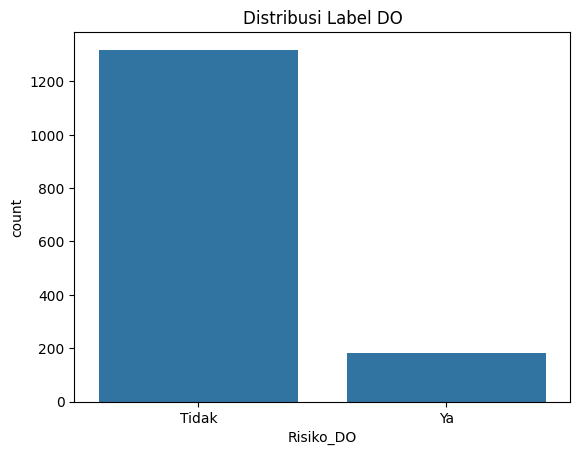

In [137]:
sns.countplot(x='Risiko_DO', data=df)
plt.title('Distribusi Label DO')
plt.show()

In [138]:
# Pisahkan fitur (X) dan target (y)
# Hapus kolom 'ID' karena tidak relevan untuk prediksi
X = df.drop([target_column, 'ID'], axis=1)
y = df[target_column]

Kode ini melakukan langkah fundamental dalam persiapan data machine learning dengan memecah dataset menjadi dua komponen utama. Variabel X dibuat sebagai himpunan fitur, yang berisi semua kolom dari data asli yang akan digunakan sebagai input untuk prediksi, namun dengan membuang kolom target ('Risiko_DO') dan kolom identitas ('ID') yang tidak relevan. Sementara itu, variabel y secara spesifik diisolasi untuk menampung data target, yaitu kolom 'Risiko_DO' yang nilainya ingin kita prediksi. Pemisahan ini esensial agar kita bisa melatih model untuk mempelajari pola dari X guna menebak hasil di y.

In [139]:
# Encoding: Mengubah semua kolom kategorikal (tipe 'object') menjadi numerik
# pd.get_dummies() secara otomatis mengubah kolom 'Pekerjaan' menjadi 'Pekerjaan_Ya' (0 atau 1)
print("\n🔄 Mengubah data kategorikal menjadi numerik (One-Hot Encoding)...")
X_encoded = pd.get_dummies(X, drop_first=True)
print("Kolom setelah encoding:", X_encoded.columns.tolist())


🔄 Mengubah data kategorikal menjadi numerik (One-Hot Encoding)...
Kolom setelah encoding: ['IPK_Sem1', 'IPK_Sem2', 'IPK_Sem3', 'IPK_Sem4', 'Kehadiran_Rata', 'Remedial_Total', 'Aktivitas_Online', 'Jam_Kerja_Mingguan', 'Pendapatan_OrangTua', 'Tanggungan_Keluarga', 'Pekerjaan_Ya']


Kode ini melakukan langkah encoding, yaitu mengubah semua kolom yang berisi data non-numerik (seperti teks) di dalam himpunan fitur X menjadi format angka yang dapat dipahami oleh model machine learning. Secara spesifik, ia menggunakan fungsi pd.get_dummies untuk melakukan one-hot encoding pada kolom 'Pekerjaan'. Proses ini secara efektif mengubah kolom 'Pekerjaan' menjadi kolom baru bernama Pekerjaan_Ya, di mana nilai 1 merepresentasikan 'Ya' dan 0 merepresentasikan 'Tidak'. Penggunaan drop_first=True adalah praktik standar untuk menghindari redundansi data, sehingga X_encoded yang dihasilkan kini sepenuhnya numerik dan siap untuk tahap selanjutnya.

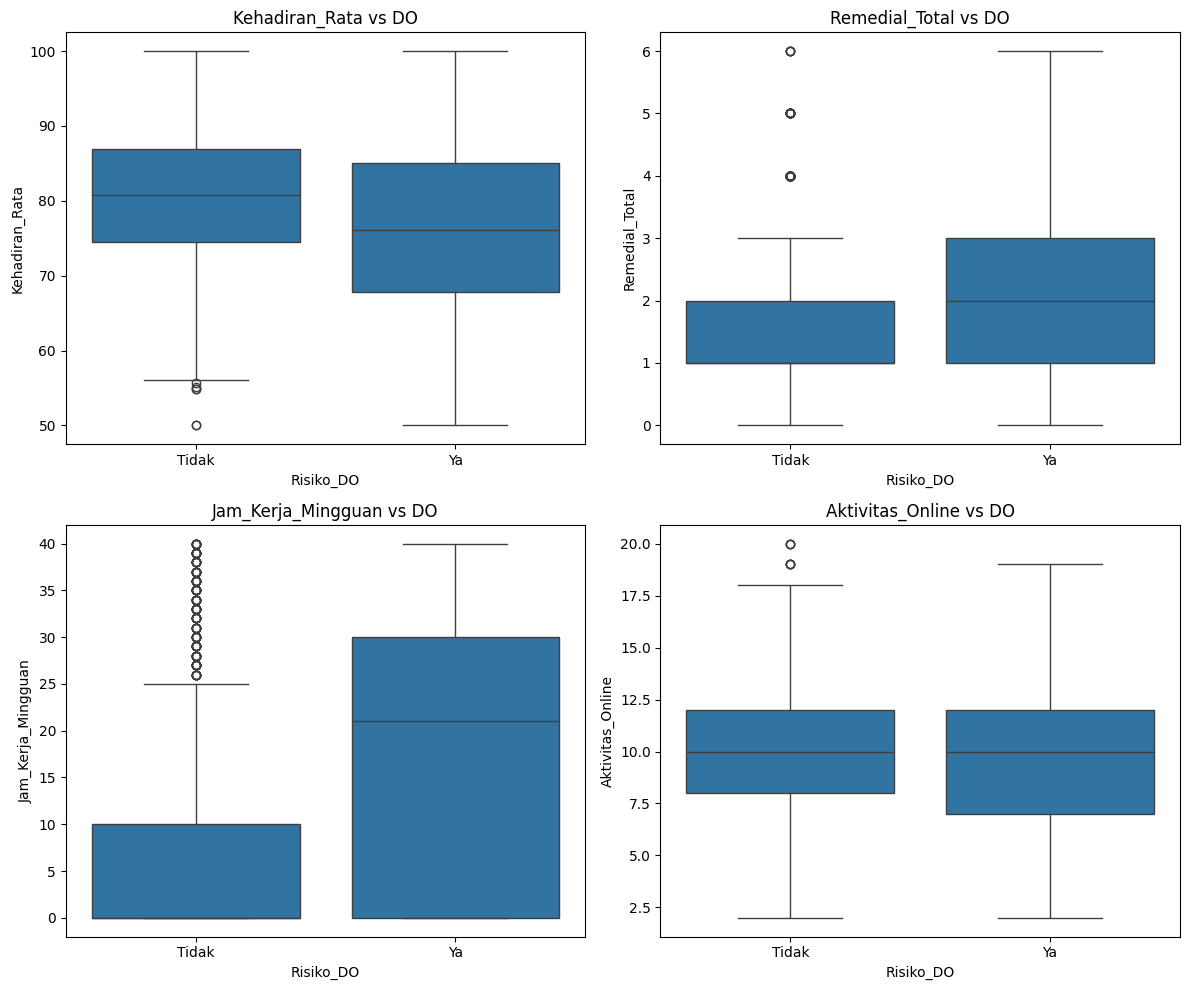

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns


cols = ['Kehadiran_Rata', 'Remedial_Total', 'Jam_Kerja_Mingguan', 'Aktivitas_Online']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop dan plot masing-masing boxplot
for i, col in enumerate(cols):
    sns.boxplot(x='Risiko_DO', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs DO')
plt.tight_layout()
plt.show()


Kode Gambar boxplot visualisasi ini menyajikan analisis perbandingan antara empat variabel numerik terhadap variabel Risiko_DO (risiko mahasiswa mengalami drop out), menggunakan boxplot. Variabel-variabel yang dibandingkan adalah Kehadiran_Rata, Remedial_Total, Jam_Kerja_Mingguan, dan Aktivitas_Online. Setiap plot memperlihatkan distribusi nilai masing-masing variabel untuk dua kelompok: mahasiswa yang tidak berisiko drop out (Risiko_DO = 0) dan yang berisiko (Risiko_DO = 1).

Pada boxplot pertama, Kehadiran_Rata menunjukkan bahwa mahasiswa yang berisiko DO cenderung memiliki tingkat kehadiran yang sedikit lebih rendah dibandingkan mereka yang tidak berisiko. Meskipun median kehadiran kedua kelompok terlihat hampir sama, rentang nilai dan jumlah outlier lebih besar pada kelompok tidak berisiko, menandakan variasi lebih besar dalam kehadiran mereka.

pada boxplot kedua memperlihatkan Remedial_Total, yaitu jumlah remedial yang diikuti mahasiswa. Terlihat bahwa mahasiswa yang berisiko DO memiliki median jumlah remedial yang lebih tinggi daripada yang tidak berisiko. Ini menunjukkan bahwa seringnya mengikuti remedial bisa menjadi indikator risiko DO.

Pada boxplot ketiga, Jam_Kerja_Mingguan tampak jauh lebih tinggi pada kelompok yang berisiko DO. Median dan rentang distribusi lebih besar pada kelompok ini, yang menunjukkan bahwa semakin banyak waktu yang dihabiskan untuk bekerja, semakin tinggi pula risiko mahasiswa mengalami drop out.

Terakhir, boxplot keempat menunjukkan distribusi Aktivitas_Online. Tidak terlihat perbedaan yang signifikan antara dua kelompok dalam hal aktivitas online. Median dan interkuartil range (IQR) keduanya relatif sama, menandakan bahwa aktivitas online mungkin tidak terlalu berkorelasi dengan risiko DO.

Secara keseluruhan, visualisasi ini menunjukkan bahwa variabel Remedial_Total, Jam_Kerja_Mingguan, dan Kehadiran_Rata memiliki pola distribusi yang cukup membedakan antara mahasiswa yang berisiko dan tidak berisiko drop out, sementara Aktivitas_Online tampak kurang berpengaruh. Insight ini dapat digunakan untuk memfokuskan intervensi pada faktor-faktor yang lebih berdampak terhadap risiko DO.

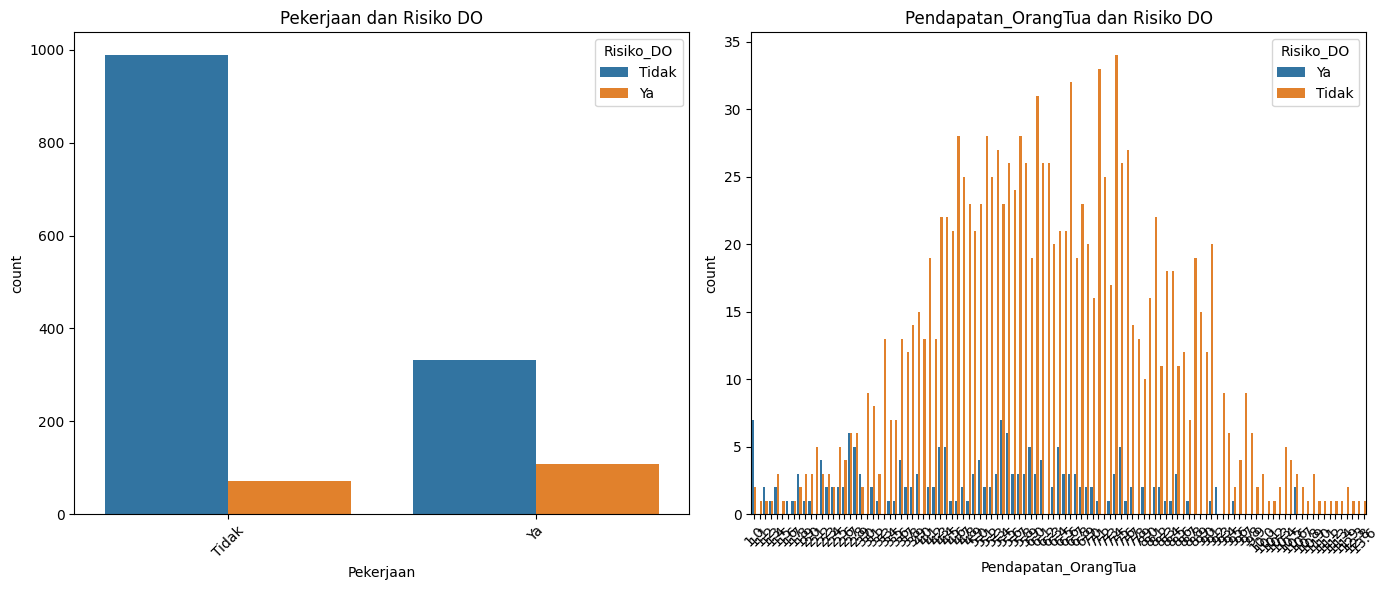

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns


cols = ['Pekerjaan', 'Pendapatan_OrangTua']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, col in enumerate(cols):
    sns.countplot(x=col, hue='Risiko_DO', data=df, ax=axes[i])
    axes[i].set_title(f'{col} dan Risiko DO')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Kode ini menunjukkan Gambar visualisasi tersebut hubungan antara dua variabel, yaitu Pekerjaan dan Pendapatan_OrangTua, terhadap variabel Risiko_DO (kemungkinan mahasiswa mengalami drop out). Pada grafik pertama, terlihat bahwa mayoritas mahasiswa berasal dari kategori Pekerjaan bernilai 0, dengan sebagian besar dari mereka tidak berisiko mengalami drop out (Risiko_DO = 0). Namun, pada kategori Pekerjaan bernilai 1, meskipun jumlahnya lebih sedikit, terdapat proporsi yang lebih tinggi dari mahasiswa yang berisiko mengalami drop out (Risiko_DO = 1). Hal ini mengindikasikan bahwa status pekerjaan dapat mempengaruhi risiko DO. Sementara itu, grafik kedua memperlihatkan distribusi Pendapatan_OrangTua terhadap Risiko_DO. Sebagian besar mahasiswa berasal dari keluarga dengan pendapatan menengah ke bawah, dan terlihat bahwa mahasiswa yang berasal dari keluarga dengan pendapatan rendah cenderung memiliki risiko DO yang lebih tinggi. Frekuensi mahasiswa dengan risiko DO menurun seiring meningkatnya pendapatan orang tua. Dari kedua grafik tersebut, dapat disimpulkan bahwa status pekerjaan dan tingkat pendapatan orang tua memiliki keterkaitan dengan risiko mahasiswa mengalami drop out, di mana kondisi sosial ekonomi yang kurang mendukung berpotensi meningkatkan risiko tersebut.

In [142]:
# Tampilkan kolom-kolom dengan nilai unik "Ya" atau "Tidak"
for col in df.columns:
    if df[col].dropna().isin(['Ya', 'Tidak']).all():
        df[col] = df[col].map({'Ya': 1, 'Tidak': 0})

# Simpan dataset yang telah diproses
df.to_csv("dataset_risiko_do_mahasiswa_encoded.csv", index=False)

print("✅ Preprocessing selesai. Data disimpan ke 'dataset_risiko_do_mahasiswa_encoded.csv'.")


✅ Preprocessing selesai. Data disimpan ke 'dataset_risiko_do_mahasiswa_encoded.csv'.


In [143]:
df.describe(include='all')


,ID,IPK_Sem1,IPK_Sem2,IPK_Sem3,IPK_Sem4,Kehadiran_Rata,Remedial_Total,Aktivitas_Online,Pekerjaan,Jam_Kerja_Mingguan,Pendapatan_OrangTua,Tanggungan_Keluarga,Risiko_DO
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
unique,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.823713,2.820473,2.805607,2.798607,80.034600,1.489333,10.040667,0.293333,7.542667,6.049000,5.646667,0.120667
std,NaN,0.490185,0.563376,0.614360,0.655775,9.736845,1.234059,3.145199,0.455442,12.633656,2.014343,2.880629,0.325848
min,NaN,1.500000,1.500000,1.500000,1.500000,50.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,NaN,2.490000,2.430000,2.370000,2.320000,73.700000,1.000000,8.000000,0.000000,0.000000,4.700000,3.000000,0.000000
50%,NaN,2.825000,2.820000,2.810000,2.780000,80.150000,1.000000,10.000000,0.000000,0.000000,6.000000,6.000000,0.000000
75%,NaN,3.140000,3.210000,3.252500,3.300000,86.700000,2.000000,12.000000,1.000000,15.000000,7.400000,8.000000,0.000000


## SPLIT DATA

In [144]:
print(y.value_counts())

Risiko_DO
Tidak    1319
Ya        181
Name: count, dtype: int64


In [145]:
# Pembagian data: 80% untuk training, 20% untuk testing
# stratify=y memastikan proporsi target di train dan test set sama
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\n📊 Data dibagi menjadi: {X_train.shape[0]} baris training dan {X_test.shape[0]} baris testing.")


📊 Data dibagi menjadi: 1200 baris training dan 300 baris testing.


Membagi dataset menjadi 80% training dan 20% testing

# MODELLING & EVALUASI

In [146]:


# 4. PEMODELAN (MODELING)
# Inisialisasi model Random Forest
# n_estimators = jumlah pohon, max_depth bisa dikontrol jika perlu, random_state untuk replikasi
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data training
model.fit(X_train, y_train)

print("Model Random Forest berhasil dilatih.")

Model Random Forest berhasil dilatih.


Kode ini merupakan bagian dari tahap pemodelan dalam proses machine learning, di mana model yang digunakan adalah Random Forest Classifier dari pustaka scikit-learn. Random Forest adalah algoritma berbasis ensemble yang menggabungkan banyak pohon keputusan (decision trees) untuk menghasilkan prediksi yang lebih akurat dan stabil. Pada baris pertama, model diinisialisasi dengan parameter n_estimators=100, yang berarti model akan membangun 100 pohon keputusan. Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan, karena proses pelatihan model melibatkan elemen acak. Selanjutnya, perintah model.fit(X_train, y_train) digunakan untuk melatih model menggunakan data latih, yaitu fitur (X_train) dan label target (y_train). Setelah model selesai dilatih, pernyataan print("Model Random Forest berhasil dilatih.") akan menampilkan pesan bahwa proses pelatihan telah berhasil dilakukan. Tahap ini sangat penting karena model yang telah dilatih inilah yang nantinya akan digunakan untuk melakukan prediksi terhadap data baru.









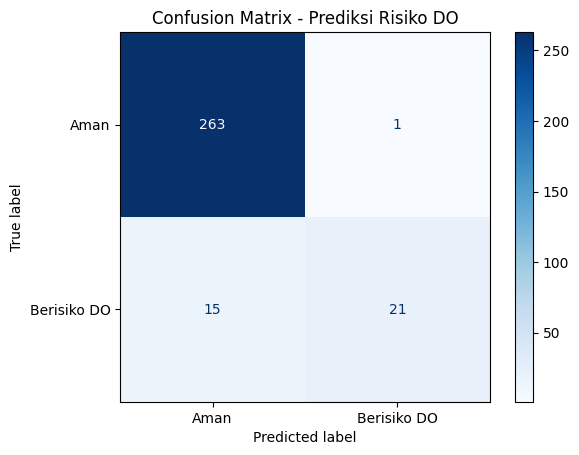


📈 Akurasi Model: 94.67%
              precision    recall  f1-score   support

        Aman       0.95      1.00      0.97       264
 Berisiko DO       0.95      0.58      0.72        36

    accuracy                           0.95       300
   macro avg       0.95      0.79      0.85       300
weighted avg       0.95      0.95      0.94       300



In [147]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Aman", "Berisiko DO"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Prediksi Risiko DO")
plt.show()
print(f"\n📈 Akurasi Model: {accuracy_score(y_test, y_pred):.2%}")
# 7. Laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=["Aman", "Berisiko DO"]))

Kode ini merupakan bagian dari **tahap evaluasi model** dalam proses machine learning, yang bertujuan untuk menilai seberapa baik model Random Forest yang telah dilatih dalam memprediksi data yang belum pernah dilihat sebelumnya (data uji/test).

Pertama, `model.predict(X_test)` digunakan untuk menghasilkan prediksi terhadap fitur-fitur dalam data uji (`X_test`). Hasil prediksi ini disimpan dalam variabel `y_pred`.

Selanjutnya, kode mencetak akurasi model menggunakan `accuracy_score(y_test, y_pred)`, yaitu rasio prediksi yang benar dibandingkan dengan total jumlah prediksi. Akurasi ditampilkan dalam bentuk persentase dengan dua angka desimal untuk memudahkan interpretasi.

Kemudian, `confusion_matrix(y_test, y_pred)` digunakan untuk menampilkan matriks kebingungan (*confusion matrix*), yang menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas (kelas 0 = "Aman", kelas 1 = "Risiko DO"). Ini membantu mengevaluasi kesalahan tipe I (false positive) dan tipe II (false negative).

Terakhir, `classification_report(y_test, y_pred, target_names=target_names)` memberikan ringkasan metrik performa model seperti **precision**, **recall**, **f1-score**, dan **support** untuk setiap kelas. Ini sangat berguna untuk memahami seberapa baik model membedakan antar kelas, khususnya ketika data tidak seimbang.

Secara keseluruhan, bagian kode ini memberikan gambaran menyeluruh tentang performa model dalam memprediksi risiko DO mahasiswa.


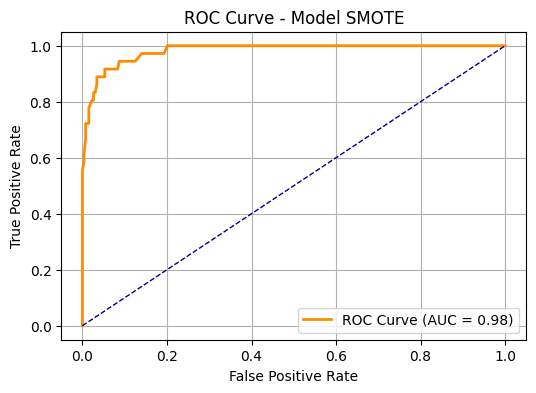

In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Jika y_test masih dalam bentuk string (seperti 'Ya', 'Tidak'), kita ubah dulu ke bentuk numerik
le = LabelEncoder()
y_test_binary = le.fit_transform(y_test)  # 'Tidak' -> 0, 'Ya' -> 1 (urutan tergantung LabelEncoder)

# Ambil probabilitas prediksi kelas positif (biasanya kelas 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Hitung ROC curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Model SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Kode pada gambar tersebut digunakan untuk memvisualisasikan performa model klasifikasi dengan menggambar kurva ROC (Receiver Operating Characteristic) menggunakan hasil prediksi dari model yang telah di-resample menggunakan metode SMOTE. Pertama, probabilitas prediksi kelas positif (label 1) diekstrak dari hasil predict_proba model. Kemudian, menggunakan fungsi roc_curve, dihitung nilai false positive rate (FPR) dan true positive rate (TPR), yang diperlukan untuk menggambar kurva ROC. Nilai AUC (Area Under the Curve) dihitung menggunakan fungsi auc(fpr, tpr).

## EXPORT & INFERENSI

In [149]:
model_filename = 'model_prediksi_do.pkl'
columns_filename = 'kolom_model.pkl'

joblib.dump(model, model_filename)
joblib.dump(X_train.columns.tolist(), columns_filename)

print(f"Model telah disimpan sebagai '{model_filename}'")
print(f"Kolom model telah disimpan sebagai '{columns_filename}'")

Model telah disimpan sebagai 'model_prediksi_do.pkl'
Kolom model telah disimpan sebagai 'kolom_model.pkl'


In [151]:
import os
import pandas as pd
import joblib

def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

def get_numeric_input(prompt, input_type=float, min_value=None, max_value=None):
    while True:
        try:
            value = input_type(input(prompt))
            if min_value is not None and value < min_value:
                print(f"❌ Nilai terlalu kecil. Harus minimal {min_value}.")
                continue
            if max_value is not None and value > max_value:
                print(f"❌ Nilai terlalu besar. Maksimal {max_value}.")
                continue
            return value
        except ValueError:
            print("❌ Input tidak valid. Harap masukkan angka.")

def get_categorical_input(prompt, options):
    while True:
        value = input(prompt).strip().capitalize()
        if value in options:
            return value
        else:
            print(f"❌ Input tidak valid. Harap masukkan salah satu dari: {', '.join(options)}")

def get_ipk_input(semester_ke, ipk_sebelumnya=None):
    """Validasi agar perubahan IPK antar semester tidak terlalu drastis (maks selisih 1.0)."""
    while True:
        ipk = get_numeric_input(f"IPK Semester {semester_ke} (contoh: 3.2): ", float, 0.0, 4.0)
        if ipk_sebelumnya is not None:
            selisih = abs(ipk - ipk_sebelumnya)
            if selisih > 1.0:
                print("❌ Perubahan IPK terlalu drastis. Harap masukkan nilai yang lebih realistis.")
                continue
        return ipk

# --- 1. MEMUAT MODEL DAN KOLOM ---
try:
    loaded_model = joblib.load('model_prediksi_do.pkl')
    model_columns = joblib.load('kolom_model.pkl')
    print("✅ Model dan kolom berhasil dimuat. Siap untuk prediksi.")
except FileNotFoundError:
    print("❌ File model tidak ditemukan. Jalankan proses training terlebih dahulu.")
    exit()

# --- 2. FUNGSI PREDIKSI ---
def prediksi_risiko_do(data_mahasiswa, threshold=0.5):
    df_input = pd.DataFrame([data_mahasiswa])
    df_processed = pd.get_dummies(df_input, drop_first=True)
    df_aligned = df_processed.reindex(columns=model_columns, fill_value=0)
    probabilitas = loaded_model.predict_proba(df_aligned)[0]
    prediksi = 1 if probabilitas[1] >= threshold else 0
    return prediksi, probabilitas

# --- 3. FUNGSI SARAN ---
def berikan_saran(data_mahasiswa):
    saran_list = []

    if data_mahasiswa['IPK_Sem4'] < 2.75:
        saran_list.append("💡 IPK semester terakhir Anda di bawah batas wajar. Segera konsultasi dengan DPA untuk menyusun strategi belajar.")
    if data_mahasiswa['Kehadiran_Rata'] < 80.0:
        saran_list.append("📌 Kehadiran Anda rendah. Pastikan untuk selalu hadir di kelas dan komunikasi dengan dosen jika ada kendala.")
    if data_mahasiswa['Remedial_Total'] > 2:
        saran_list.append("📚 Jumlah remedial cukup banyak. Pertimbangkan kelas tambahan atau tutor sebaya.")
    if data_mahasiswa['Pekerjaan'] == 'Ya' and data_mahasiswa['Jam_Kerja_Mingguan'] > 20:
        saran_list.append("⏰ Jam kerja tinggi. Atur jadwal ketat agar tidak mengganggu akademik.")
    if data_mahasiswa['Tanggungan_Keluarga'] > 0:
        pendapatan_per_tanggungan = data_mahasiswa['Pendapatan_OrangTua'] / data_mahasiswa['Tanggungan_Keluarga']
        if pendapatan_per_tanggungan < 1.5:
            saran_list.append("💰 Pertimbangkan mencari beasiswa atau bantuan pendidikan jika mengalami kendala finansial.")

    return saran_list

# --- 4. LOOP UTAMA ---
while True:
    clear_screen()
    print("==============================================")
    print("   Sistem Prediksi Risiko Drop Out Mahasiswa  ")
    print("==============================================")
    print("Silakan masukkan data mahasiswa baru:\n")

    ipk_sem1 = get_ipk_input(1)
    ipk_sem2 = get_ipk_input(2, ipk_sem1)
    ipk_sem3 = get_ipk_input(3, ipk_sem2)
    ipk_sem4 = get_ipk_input(4, ipk_sem3)

    data_baru = {
        'IPK_Sem1': ipk_sem1,
        'IPK_Sem2': ipk_sem2,
        'IPK_Sem3': ipk_sem3,
        'IPK_Sem4': ipk_sem4,
        'Kehadiran_Rata': get_numeric_input("Rata-rata Kehadiran (%) (contoh: 85): ", float),
        'Remedial_Total': get_numeric_input("Total Remedial (contoh: 2): ", int),
        'Aktivitas_Online': get_numeric_input("Aktivitas Online (jam/minggu) (contoh: 10): ", int),
        'Pekerjaan': get_categorical_input("Apakah mahasiswa bekerja? (Ya/Tidak): ", ['Ya', 'Tidak']),
        'Jam_Kerja_Mingguan': get_numeric_input("Jam Kerja per Minggu (isi 0 jika tidak bekerja): ", int),
        'Pendapatan_OrangTua': get_numeric_input("Pendapatan Orang Tua (juta/bulan) (contoh: 5.5): ", float),
        'Tanggungan_Keluarga': get_numeric_input("Jumlah Tanggungan Keluarga (contoh: 4): ", int),
    }

    prediksi, probabilitas = prediksi_risiko_do(data_baru, threshold=0.5)

    print("\n------------------ HASIL PREDIKSI ------------------")
    if prediksi == 1:
        print("🔴 Status Prediksi: BERISIKO DROP OUT")
    else:
        print("🟢 Status Prediksi: AMAN")

    print("\nKeyakinan Model:")
    print(f"  - Probabilitas Aman: {probabilitas[0]:.2%}")
    print(f"  - Probabilitas Berisiko DO: {probabilitas[1]:.2%}")

    saran = berikan_saran(data_baru)
    if saran:
        print("\n🔍 Rekomendasi Peningkatan atau Perbaikan:")
        for item in saran:
            print(f"   - {item}")
    else:
        print("\n✅ Tidak ada rekomendasi khusus. Pertahankan performa baik Anda!")

    print("----------------------------------------------------\n")

    lagi = input("Apakah Anda ingin menguji data mahasiswa lain? (y/n): ").strip().lower()
    if lagi != 'y':
        print("\n👋 Terima kasih telah menggunakan sistem prediksi. Sampai jumpa!")
        break


✅ Model dan kolom berhasil dimuat. Siap untuk prediksi.
   Sistem Prediksi Risiko Drop Out Mahasiswa  
Silakan masukkan data mahasiswa baru:

IPK Semester 1 (contoh: 3.2): 4
IPK Semester 2 (contoh: 3.2): 4
IPK Semester 3 (contoh: 3.2): 4
IPK Semester 4 (contoh: 3.2): 4
Rata-rata Kehadiran (%) (contoh: 85): 95
Total Remedial (contoh: 2): 0
Aktivitas Online (jam/minggu) (contoh: 10): 2
Apakah mahasiswa bekerja? (Ya/Tidak): ya
Jam Kerja per Minggu (isi 0 jika tidak bekerja): 8
Pendapatan Orang Tua (juta/bulan) (contoh: 5.5): 20
Jumlah Tanggungan Keluarga (contoh: 4): 1

------------------ HASIL PREDIKSI ------------------
🟢 Status Prediksi: AMAN

Keyakinan Model:
  - Probabilitas Aman: 97.00%
  - Probabilitas Berisiko DO: 3.00%

✅ Tidak ada rekomendasi khusus. Pertahankan performa baik Anda!
----------------------------------------------------

Apakah Anda ingin menguji data mahasiswa lain? (y/n): y
   Sistem Prediksi Risiko Drop Out Mahasiswa  
Silakan masukkan data mahasiswa baru:

IPK 